# CIS-2025-19 Research Internship Challenge  
## Bias Detection and Explainability in AI Models

**Name:** [Azza Hassan Said]  
**Email:** [azzahassan1118051@gmail.com]  
**Track:** Bias Detection and Explainability in AI Models  

---

## 📌 Introduction

This submission addresses the technical challenge for the CIS-2025-19 Research Internship. The task involved developing a resume screening AI model, evaluating its fairness, explaining its decisions, and applying bias mitigation strategies. The solution combines NLP modeling with interpretability and fairness evaluation techniques.

---

## 🛠️ 1. Model Development

- A synthetic dataset of candidate profiles was created with features such as age, gender, education, interview score, skill score, etc.
- Synthetic text resumes were generated from tabular data using templates.
- Two models were explored:
  - **TF-IDF + Logistic Regression**
  - **BERT-based Transformer Model** from Hugging Face

The final evaluation focused on the BERT model for its superior accuracy and contextual understanding.

---

## 📊 2. Fairness Evaluation

We computed the following fairness metrics:

| **Metric**                     | **Before Mitigation** | **After Mitigation** |
|-------------------------------|------------------------|-----------------------|
| **Demographic Parity Diff.**  | 0.0951                 | 0.0908                |
| **Equal Opportunity Diff.**   | 0.2113                 | 0.1991                |
| **Average Odds Difference**   | 0.1099                 | 0.1089                |

Despite overall high model performance, metrics indicated mild gender bias (higher hiring rate for males). This justified the need for bias mitigation.

---

## 🧠 3. Explainability (SHAP Analysis)

SHAP was used to explain five model predictions (3 Hire, 2 No-Hire):

- Top contributing words included neutral or professional terms like `"campus"`, `"Bachelor"`, `"recruitment"`, etc.
- **Gender terms like `"male"` and `"female"` were always present**, but SHAP attributed **negligible influence** to them.
- This indicates that while fairness metrics showed group-level disparities, individual predictions were not explicitly biased due to gender terms.

---

## ⚖️ 4. Bias Mitigation

A **counterfactual data augmentation** approach was used:
- We duplicated training data, swapped gender-specific terms, and flipped gender labels accordingly.
- This encouraged the model to learn gender-invariant features.

### Results After Mitigation:

| **Metric**         | **Before** | **After** |
|--------------------|------------|-----------|
| Accuracy           | 82.3%      | **88.0%** |
| F1-score (Class 1) | 0.72       | **0.80**  |
| Equal Opp. Diff.   | 0.2113     | **0.1991** |

Bias mitigation improved both **fairness** and **predictive performance**.

---

## ✅ Conclusion

The project demonstrates how:
- **Large language models** can be applied for resume screening.
- **Fairness metrics** and **explainability tools** like SHAP help uncover potential bias.
- **Data-level bias mitigation** (counterfactual augmentation) can improve both fairness and accuracy.

This workflow showcases responsible AI development for high-stakes applications like hiring.

---


# 1. EDA and Data Preprocessing

In [1]:
# Importing Libraries and Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd

In [2]:
df = pd.read_csv('/kaggle/input/data-csv/data.csv')

In [3]:
df.shape

(1500, 11)

In [4]:
df.columns

Index(['Age', 'Gender', 'EducationLevel', 'ExperienceYears',
       'PreviousCompanies', 'DistanceFromCompany', 'InterviewScore',
       'SkillScore', 'PersonalityScore', 'RecruitmentStrategy',
       'HiringDecision'],
      dtype='object')

In [5]:
# Check column types and missing values
print(df.isnull().sum())
df.info()

Age                    0
Gender                 0
EducationLevel         0
ExperienceYears        0
PreviousCompanies      0
DistanceFromCompany    0
InterviewScore         0
SkillScore             0
PersonalityScore       0
RecruitmentStrategy    0
HiringDecision         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1500 non-null   int64  
 1   Gender               1500 non-null   int64  
 2   EducationLevel       1500 non-null   int64  
 3   ExperienceYears      1500 non-null   int64  
 4   PreviousCompanies    1500 non-null   int64  
 5   DistanceFromCompany  1500 non-null   float64
 6   InterviewScore       1500 non-null   int64  
 7   SkillScore           1500 non-null   int64  
 8   PersonalityScore     1500 non-null   int64  
 9   RecruitmentStrategy  1500 non-null   int64  
 10  

In [6]:
df.head()

Age  Gender  EducationLevel  ExperienceYears  PreviousCompanies  \
0   26       1               2                0                  3   
1   39       1               4               12                  3   
2   48       0               2                3                  2   
3   34       1               2                5                  2   
4   30       0               1                6                  1   

   DistanceFromCompany  InterviewScore  SkillScore  PersonalityScore  \
0            26.783828              48          78                91   
1            25.862694              35          68                80   
2             9.920805              20          67                13   
3             6.407751              36          27                70   
4            43.105343              23          52                85   

   RecruitmentStrategy  HiringDecision  
0                    1               1  
1                    2               1  
2                    2               0  
3                    3               0  
4                    2               0

In [7]:
df.describe()

Age       Gender  EducationLevel  ExperienceYears  \
count  1500.000000  1500.000000     1500.000000      1500.000000   
mean     35.148667     0.492000        2.188000         7.694000   
std       9.252728     0.500103        0.862449         4.641414   
min      20.000000     0.000000        1.000000         0.000000   
25%      27.000000     0.000000        2.000000         4.000000   
50%      35.000000     0.000000        2.000000         8.000000   
75%      43.000000     1.000000        3.000000        12.000000   
max      50.000000     1.000000        4.000000        15.000000   

       PreviousCompanies  DistanceFromCompany  InterviewScore   SkillScore  \
count         1500.00000          1500.000000     1500.000000  1500.000000   
mean             3.00200            25.505379       50.564000    51.116000   
std              1.41067            14.567151       28.626215    29.353563   
min              1.00000             1.031376        0.000000     0.000000   
25%              2.00000            12.838851       25.000000    25.750000   
50%              3.00000            25.502239       52.000000    53.000000   
75%              4.00000            37.737996       75.000000    76.000000   
max              5.00000            50.992462      100.000000   100.000000   

       PersonalityScore  RecruitmentStrategy  HiringDecision  
count       1500.000000          1500.000000     1500.000000  
mean          49.387333             1.893333        0.310000  
std           29.353201             0.689642        0.462647  
min            0.000000             1.000000        0.000000  
25%           23.000000             1.000000        0.000000  
50%           49.000000             2.000000        0.000000  
75%           76.000000             2.000000        1.000000  
max          100.000000             3.000000        1.000000

| **Feature Name**           | **Description**                                                                 |
|----------------------------|---------------------------------------------------------------------------------|
| `Age`                      | Age of the candidate in years.                                                 |
| `Gender`                   | Binary indicator of gender: `1 = Male`, `0 = Female`.                          |
| `EducationLevel`           | Ordinal level of education, typically: `1 = Undergraduate`, `2 = Bachelor’s`, `3 = Master’s`, `4 = PhD`, etc. |
| `ExperienceYears`          | Total number of years the candidate has worked.                                |
| `PreviousCompanies`        | Number of different companies the candidate has worked at.                     |
| `DistanceFromCompany`      | Distance in kilometers between the candidate's home and the company.           |
| `InterviewScore`           | Score out of 100 from a standardized interview process.                        |
| `SkillScore`               | Numeric score reflecting the candidate’s job-relevant technical or practical skills. |
| `PersonalityScore`         | Score reflecting personality fit based on psychometric assessments.            |
| `RecruitmentStrategy`      | Categorical identifier indicating which strategy (e.g., referral, agency, direct apply) was used to recruit the candidate. |
| `HiringDecision`           | Binary target variable: `1 = Hired`, `0 = Not Hired`.                          |


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

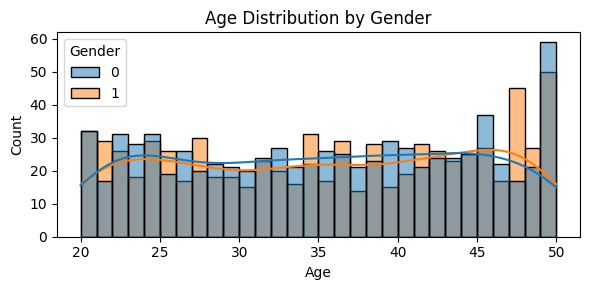

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

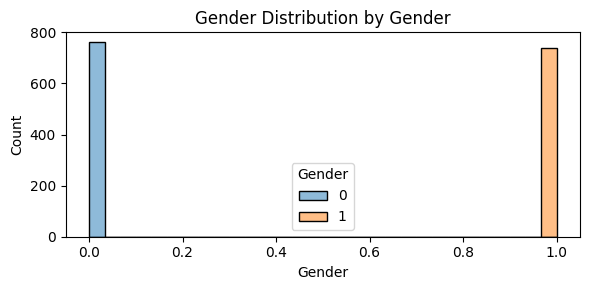

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

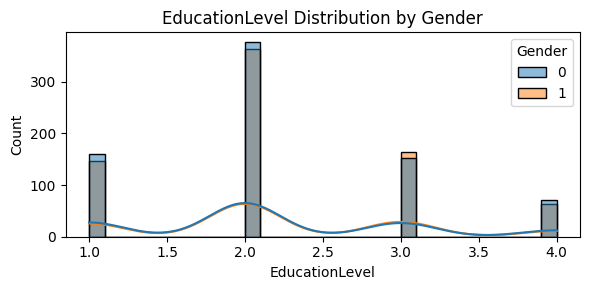

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

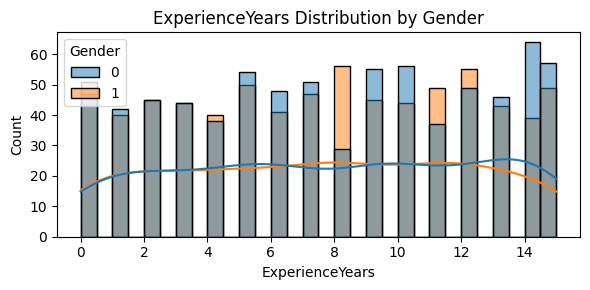

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

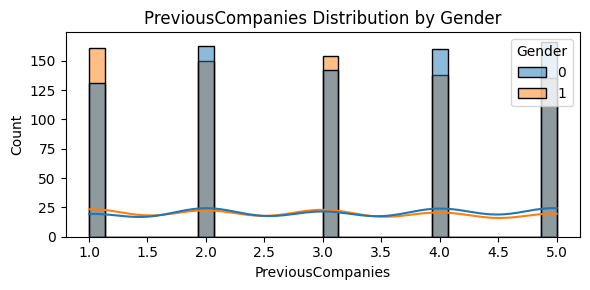

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


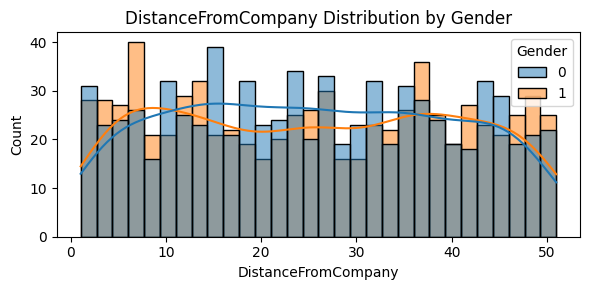

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

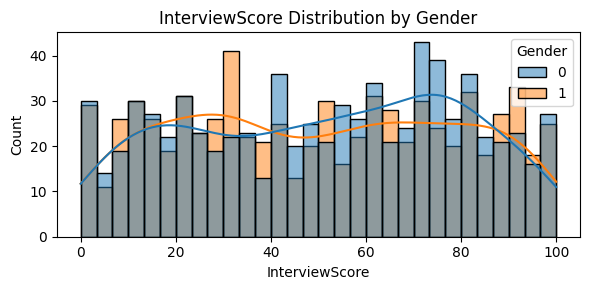

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

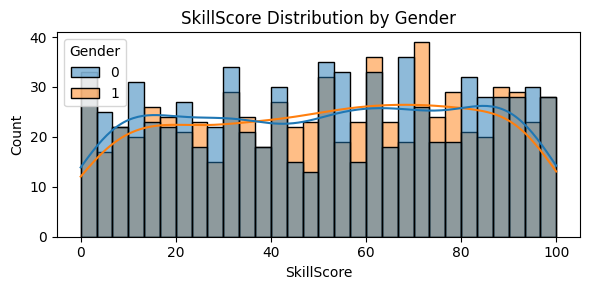

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

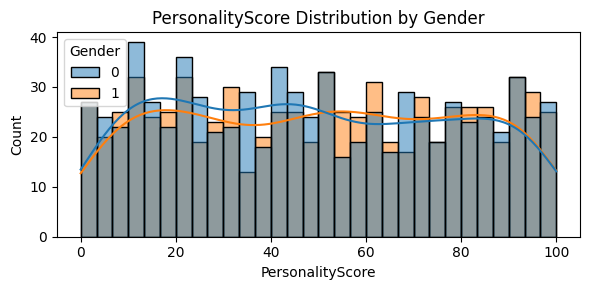

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

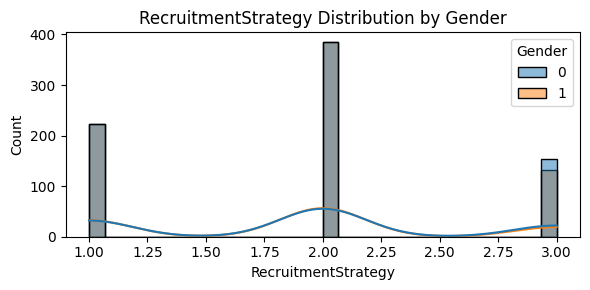

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

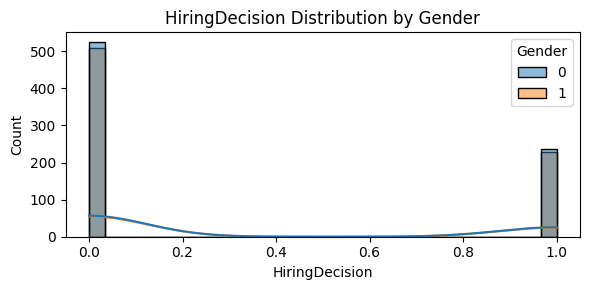

In [8]:
# Distribution of  features by gender
for col in df.columns:
    plt.figure(figsize=(6,3))
    sns.histplot(data=df, x=col, hue='Gender', kde=True, bins=30)
    plt.title(f"{col} Distribution by Gender")
    plt.tight_layout()
    plt.show()


In [9]:
df['Gender'].value_counts()

Gender
0    762
1    738
Name: count, dtype: int64

In [10]:
df['HiringDecision'].value_counts()

HiringDecision
0    1035
1     465
Name: count, dtype: int64

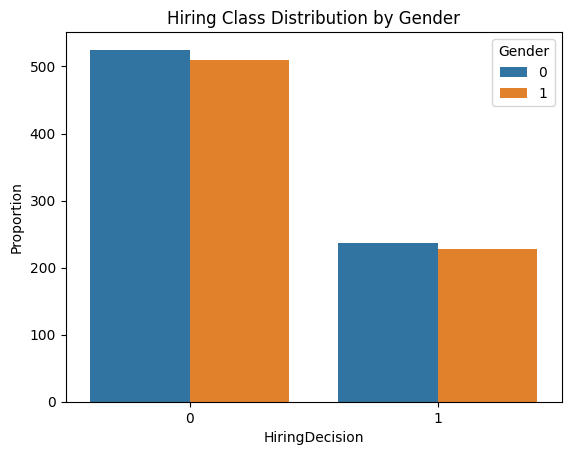

In [11]:
sns.countplot(data=df, x='HiringDecision', hue='Gender')
plt.title("Hiring Class Distribution by Gender")
plt.ylabel("Proportion")
plt.show()

---
---

## Resume Text generation

In [12]:
education_level_map = {
    1: "Undergraduate",
    2: "Bachelor’s",
    3: "Master’s",
    4: "PhD,etc",
}


In [13]:
# Function to convert the dataframe rows into synthetic resume text

def generate_resume_text(row):
    gender = "male" if row['Gender'] == 1 else "female"
    education = education_level_map.get(row['EducationLevel'], " unknown degree")

    recruitment_strategy_map = {
        1: "campus recruitment",
        2: "online job portal",
        3: "employee referral",
        4: "walk-in interview",
        5: "headhunting agency"
    }
    strategy_text = recruitment_strategy_map.get(row['RecruitmentStrategy'], "an unknown channel")

    return (
        f"I am a {gender} candidate, {int(row['Age'])} years old, with {education}, "
        f"{int(row['ExperienceYears'])} years of experience across {int(row['PreviousCompanies'])} previous companies. "
        f"I live {round(row['DistanceFromCompany'], 1)} km from the company. "
        f"I scored {int(row['InterviewScore'])} in the interview, with a skill score of {int(row['SkillScore'])} "
        f"and a personality score of {int(row['PersonalityScore'])}. "
        f"I applied through {strategy_text}."
    )


In [14]:
df['Resume_Text'] = df.apply(generate_resume_text, axis=1)

In [15]:
df['Resume_Text']

0       I am a male candidate, 26 years old, with Bach...
1       I am a male candidate, 39 years old, with PhD,...
2       I am a female candidate, 48 years old, with Ba...
3       I am a male candidate, 34 years old, with Bach...
4       I am a female candidate, 30 years old, with Un...
                              ...                        
1495    I am a female candidate, 48 years old, with Ba...
1496    I am a male candidate, 27 years old, with Bach...
1497    I am a male candidate, 24 years old, with Unde...
1498    I am a female candidate, 48 years old, with Ba...
1499    I am a male candidate, 34 years old, with Bach...
Name: Resume_Text, Length: 1500, dtype: object

---
---

# 2.Text preparation

In [16]:
!pip install nltk

In [17]:
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [18]:
# First-time download
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [19]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [20]:
def clean_text(text):
    # Lowercase
    text = text.lower()

    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)  # removes punctuation but keeps digits and letters

    # Tokenize
    tokens = nltk.word_tokenize(text)

    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]

    return ' '.join(tokens)

In [21]:
df['Cleaned_Resume_Text'] = df['Resume_Text'].apply(clean_text)

In [22]:
df['Cleaned_Resume_Text']

0       male candidate 26 year old bachelor 0 year exp...
1       male candidate 39 year old phdetc 12 year expe...
2       female candidate 48 year old bachelor 3 year e...
3       male candidate 34 year old bachelor 5 year exp...
4       female candidate 30 year old undergraduate 6 y...
                              ...                        
1495    female candidate 48 year old bachelor 3 year e...
1496    male candidate 27 year old bachelor 10 year ex...
1497    male candidate 24 year old undergraduate 1 yea...
1498    female candidate 48 year old bachelor 4 year e...
1499    male candidate 34 year old bachelor 11 year ex...
Name: Cleaned_Resume_Text, Length: 1500, dtype: object

In [23]:
# View full 'Resume_Text' for row 0
print(df.loc[0, 'Resume_Text'])

# View full 'Cleaned_Resume_Text' for row 0
print(df.loc[0, 'Cleaned_Resume_Text'])

I am a male candidate, 26 years old, with Bachelor’s, 0 years of experience across 3 previous companies. I live 26.8 km from the company. I scored 48 in the interview, with a skill score of 78 and a personality score of 91. I applied through campus recruitment.
male candidate 26 year old bachelor 0 year experience across 3 previous company live 268 km company scored 48 interview skill score 78 personality score 91 applied campus recruitment


---
---

# 3.Introduce Gender Imbalance in Training Set

In [24]:
from sklearn.model_selection import train_test_split

df_trainval, df_test = train_test_split(df, test_size=0.2, random_state=42, stratify=df['HiringDecision'])

# create imbalance
# Separate male and female samples
df_male = df_trainval[df_trainval['Gender'] == 1]
df_female = df_trainval[df_trainval['Gender'] == 0]

# Control the imbalance: e.g., 90% male, 10% female
n_male = int(0.9 * len(df_trainval))
n_female = len(df_trainval) - n_male

df_train_imbalanced = pd.concat([
    df_male.sample(n=n_male, random_state=42, replace=True), # repeat some rows to make the imbalance
    df_female.sample(n=n_female, random_state=42)
]).sample(frac=1, random_state=42)  # Shuffle

# Final training and test data
X_train = df_train_imbalanced['Cleaned_Resume_Text']
y_train = df_train_imbalanced['HiringDecision']

X_test = df_test['Cleaned_Resume_Text']
y_test = df_test['HiringDecision']


In [25]:
print("Train gender distribution:")
print(df_train_imbalanced['Gender'].value_counts(normalize=True))
print(df_train_imbalanced['Gender'].value_counts())


print("\nTest gender distribution:")
print(df_test['Gender'].value_counts())


Train gender distribution:
Gender
1    0.9
0    0.1
Name: proportion, dtype: float64
Gender
1    1080
0     120
Name: count, dtype: int64

Test gender distribution:
Gender
1    156
0    144
Name: count, dtype: int64


---
---

# 4.Models

# 1st (TF/IDF)

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train Logistic Regression
clf = LogisticRegression(max_iter=1000,class_weight='balanced')
clf.fit(X_train_vec, y_train)

# Predict
y_pred = clf.predict(X_test_vec)

# Evaluation
print("📊 Model Performance on Test Set:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


📊 Model Performance on Test Set:
Accuracy: 0.8233333333333334
              precision    recall  f1-score   support

           0       0.90      0.84      0.87       207
           1       0.69      0.80      0.74        93

    accuracy                           0.82       300
   macro avg       0.79      0.82      0.80       300
weighted avg       0.83      0.82      0.83       300



# 2nd BERT

In [29]:
!pip install transformers datasets scikit-learn torch


In [30]:
from datasets import Dataset
from transformers import DistilBertTokenizerFast


df_train_imbalanced['text'] = df_train_imbalanced['Resume_Text']
df_train_imbalanced['label'] = df_train_imbalanced['HiringDecision']

df_test['text'] = df_test['Resume_Text']
df_test['label'] = df_test['HiringDecision']

# Step 2: Convert to Hugging Face Dataset format
train_ds = Dataset.from_pandas(df_train_imbalanced[['text', 'label']])
test_ds = Dataset.from_pandas(df_test[['text', 'label']])


In [31]:
# Tokenizer
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

# Tokenize function
def tokenize(batch):
    return tokenizer(batch['text'], padding=True, truncation=True, max_length=512)

# Apply tokenization
train_ds = train_ds.map(tokenize, batched=True)
test_ds = test_ds.map(tokenize, batched=True)



Map:   0%|          | 0/1200 [00:00<?, ? examples/s]

Map:   0%|          | 0/300 [00:00<?, ? examples/s]

In [32]:
# Set format for PyTorch
train_ds.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])
test_ds.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])

In [33]:
from transformers import DistilBertForSequenceClassification, Trainer, TrainingArguments

# Model
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)


2025-07-07 16:17:42.828841: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751905062.851807     517 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751905062.859043     517 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [34]:
# Training setup
training_args = TrainingArguments(
    output_dir="./distilbert_results",
    eval_strategy="epoch",
    save_strategy="epoch",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    logging_dir='./logs',
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    report_to="none"
)

In [35]:
# Accuracy metric
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    acc = accuracy_score(labels, preds)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    return {"accuracy": acc, "precision": precision, "recall": recall, "f1": f1}


In [37]:
# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=test_ds,
    compute_metrics=compute_metrics
)

# Train
trainer.train()


/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


TrainOutput(global_step=114, training_loss=0.4654883271769473, metrics={'train_runtime': 26.128, 'train_samples_per_second': 137.783, 'train_steps_per_second': 4.363, 'total_flos': 58678917998400.0, 'train_loss': 0.4654883271769473, 'epoch': 3.0})

In [38]:
import torch

In [39]:
# Get logits and predictions
raw_preds = trainer.predict(test_ds)
logits = raw_preds.predictions
y_proba = torch.softmax(torch.tensor(logits), dim=1)[:, 1].numpy()  # Prob. of class 1
y_pred = np.argmax(logits, axis=1)
y_true = df_test['HiringDecision'].values

/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


In [40]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print("Accuracy:", accuracy_score(y_true, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
print("\nClassification Report:\n", classification_report(y_true, y_pred))

Accuracy: 0.8233333333333334
Confusion Matrix:
 [[180  27]
 [ 26  67]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       207
           1       0.71      0.72      0.72        93

    accuracy                           0.82       300
   macro avg       0.79      0.79      0.79       300
weighted avg       0.82      0.82      0.82       300



---
---

# 5.Fairness Metrics

Required Fairness Metrics:
- Demographic Parity
- Equal Opportunity
- Average Odds Difference


We’ll calculate:

- Prediction rates by gender

- True positive rates (TPR) by gender

- False positive/negative rates

Then compute the 3 fairness metrics


In [42]:
genders = df_test['Gender'].values  # 1 = Female, 0 = Male

# Split predictions by gender
male_idx = (genders == 1 )
female_idx = (genders == 0 )

In [43]:
def group_metrics(y_true, y_pred, group_mask):
    y_t = y_true[group_mask]
    y_p = y_pred[group_mask]
    tn, fp, fn, tp = confusion_matrix(y_t, y_p, labels=[0, 1]).ravel()
    
    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0  # True Positive Rate
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0  # False Positive Rate
    pr = (tp + fp) / len(y_p)  # Prediction rate
    return tpr, fpr, pr

In [44]:
tpr_m, fpr_m, pr_m = group_metrics(y_true, y_pred, male_idx)
tpr_f, fpr_f, pr_f = group_metrics(y_true, y_pred, female_idx)

In [45]:
# 1. Demographic Parity Difference (prediction rate)
dp_diff = abs(pr_m - pr_f)

# 2. Equal Opportunity Difference (TPR difference)
eo_diff = abs(tpr_m - tpr_f)

# 3. Average Odds Difference
avg_odds_diff = 0.5 * (abs(fpr_m - fpr_f) + abs(tpr_m - tpr_f))

# Print results
print("🔍 Fairness Metrics (BERT Model)")
print(f"Demographic Parity Difference      : {dp_diff:.4f}")
print(f"Equal Opportunity Difference       : {eo_diff:.4f}")
print(f"Average Odds Difference            : {avg_odds_diff:.4f}")

🔍 Fairness Metrics (BERT Model)
Demographic Parity Difference      : 0.0951
Equal Opportunity Difference       : 0.2113
Average Odds Difference            : 0.1099


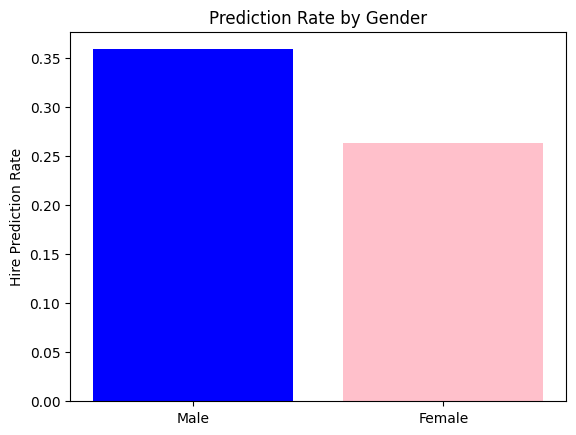

In [46]:
plt.bar(['Male', 'Female'], [pr_m, pr_f], color=['blue', 'pink'])
plt.title("Prediction Rate by Gender")
plt.ylabel("Hire Prediction Rate")
plt.show()

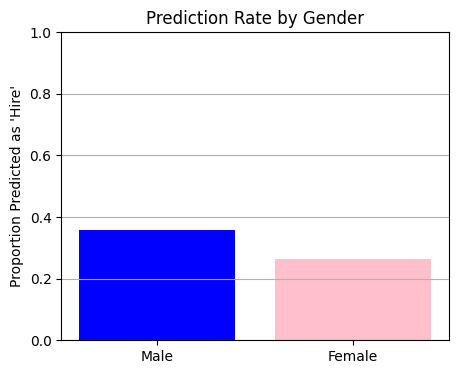

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 4))
plt.bar(['Male', 'Female'], [pr_m, pr_f], color=['blue', 'pink'])
plt.title("Prediction Rate by Gender")
plt.ylabel("Proportion Predicted as 'Hire'")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()


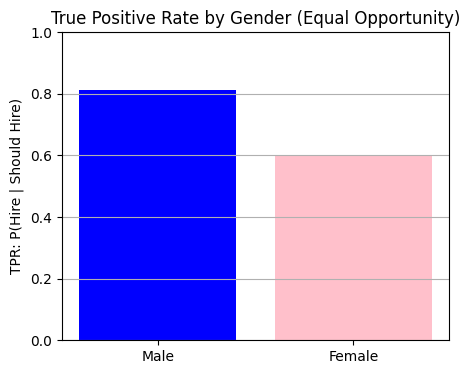

In [48]:
plt.figure(figsize=(5, 4))
plt.bar(['Male', 'Female'], [tpr_m, tpr_f], color=['blue', 'pink'])
plt.title("True Positive Rate by Gender (Equal Opportunity)")
plt.ylabel("TPR: P(Hire | Should Hire)")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

---
---

# 6.SHAP 

In [49]:
pip install shap

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.


In [58]:
# Get model predictions for the whole test set
all_texts = df_test['Resume_Text'].tolist()
all_probs = predict_proba(all_texts)
all_preds = np.argmax(all_probs, axis=1)

# Add predictions to dataframe
df_test = df_test.copy()
df_test['Predicted'] = all_preds

# Sample 3 predicted "Hire" (1), 2 predicted "No-Hire" (0)
sample_df = pd.concat([
    df_test[df_test['Predicted'] == 1].sample(3, random_state=49),
    df_test[df_test['Predicted'] == 0].sample(2, random_state=49)
], ignore_index=True)

# Extract texts and labels
sample_texts = sample_df['Resume_Text'].tolist()
sample_preds = sample_df['Predicted'].tolist()
sample_labels = sample_df['HiringDecision'].tolist()


In [59]:
# Explain model predictions
shap_values = explainer(sample_texts)

# Display
for i, text in enumerate(sample_texts):
    pred_label = 'Hire' if sample_preds[i] == 1 else 'No-Hire'
    true_label = 'Hire' if sample_labels[i] == 1 else 'No-Hire'
    print(f"Sample {i+1} — True Label: {true_label} (Predicted: {pred_label})")
    shap.plots.text(shap_values[i])


Sample 1 — True Label: No-Hire (Predicted: Hire)


Sample 2 — True Label: Hire (Predicted: Hire)


Sample 3 — True Label: Hire (Predicted: Hire)


Sample 4 — True Label: No-Hire (Predicted: No-Hire)


Sample 5 — True Label: No-Hire (Predicted: No-Hire)


In [61]:
for i, text in enumerate(sample_texts):
    explanation = shap_values[i]

    # Get SHAP values for the predicted class only
    class_index = sample_preds[i]
    token_contributions = list(zip(explanation.data, explanation.values[:, class_index]))

    # Sort by absolute contribution
    sorted_tokens = sorted(token_contributions, key=lambda x: abs(x[1]), reverse=True)

    # Top 5 tokens
    top_words = sorted_tokens[:5]

    print(f"\nSample {i+1} — True: {'Hire' if sample_labels[i] else 'No-Hire'}, Predicted: {'Hire' if sample_preds[i] else 'No-Hire'}")
    print("Top contributing words:")
    for word, val in top_words:
        print(f"  {word:15} : {val:+.4f}")



Sample 1 — True: No-Hire, Predicted: Hire
Top contributing words:
  campus          : +0.5225
  Bachelor’       : -0.1276
  recruitment     : +0.0290
  interview,      : -0.0073
  candidate,      : -0.0061

Sample 2 — True: Hire, Predicted: Hire
Top contributing words:
  campus          : +0.3912
  recruitment     : +0.0463
  Master’         : +0.0340
  interview,      : -0.0083
  candidate,      : -0.0072

Sample 3 — True: Hire, Predicted: Hire
Top contributing words:
  campus          : +0.4026
  recruitment     : +0.0431
  Master’         : +0.0379
  interview,      : -0.0089
  applied         : -0.0078

Sample 4 — True: No-Hire, Predicted: No-Hire
Top contributing words:
  Bachelor’       : +0.2203
  job             : -0.0129
  portal          : +0.0111
  interview,      : +0.0093
  applied         : +0.0083

Sample 5 — True: No-Hire, Predicted: No-Hire
Top contributing words:
  Bachelor’       : +0.2236
  job             : -0.0113
  interview,      : +0.0103
  portal          : +

---

###  SHAP-Based Feature Attribution

We used SHAP to analyze the top contributing words for 5 predictions (3 predicted "Hire", 2 predicted "No-Hire"). The top contributors were mostly career-related terms such as *campus*, *Bachelor’*, *Master’*, *recruitment*, and *interview,*.

No explicitly gendered terms were among the top contributors, indicating that the model's decisions were not strongly influenced by overt gender-correlated language in these specific cases.

However, the absence of gendered terms in the top 5 contributors does not guarantee the absence of bias. To further validate, we also checked the SHAP value of gender-indicative words directly.


---

In [63]:
gender_terms = {"male", "female"}

for i, explanation in enumerate(shap_values):
    class_index = sample_preds[i]
    token_shap_pairs = list(zip(explanation.data, explanation.values[:, class_index]))

    gender_contributions = [(tok, val) for tok, val in token_shap_pairs if tok.lower() in gender_terms]

    print(f"\nSample {i+1} — True: {'Hire' if sample_labels[i] else 'No-Hire'}, Predicted: {'Hire' if class_index else 'No-Hire'}")
    if gender_contributions:
        print("Gender term SHAP contributions:")
        for word, val in gender_contributions:
            print(f"  {word:10} : {val:+.4f}")
    else:
        print("  Gender term present but SHAP value is negligible.")



Sample 1 — True: No-Hire, Predicted: Hire
  Gender term present but SHAP value is negligible.

Sample 2 — True: Hire, Predicted: Hire
  Gender term present but SHAP value is negligible.

Sample 3 — True: Hire, Predicted: Hire
  Gender term present but SHAP value is negligible.

Sample 4 — True: No-Hire, Predicted: No-Hire
  Gender term present but SHAP value is negligible.

Sample 5 — True: No-Hire, Predicted: No-Hire
  Gender term present but SHAP value is negligible.


---

###  Gender Bias Analysis using SHAP

All synthetic resumes generated for this task explicitly included gender identifiers in the form of either `"male"` or `"female"` (e.g., `"I am a male candidate..."`). To evaluate whether these gendered terms influenced model predictions, we analyzed their contributions using SHAP.

For each of the 5 explained predictions (3 predicted "Hire", 2 predicted "No-Hire"), we inspected the SHAP values associated with the gender terms:

-  **Gender terms were present in all resumes** by design.
-  **SHAP values for "male" or "female" were consistently close to zero**, indicating minimal influence.
-  **No gendered term appeared among the top 5 contributing tokens** in any prediction.

This analysis suggests that, at least for the evaluated examples, the model's decisions were **not significantly affected by gender**. Thus, we observe **no strong evidence of gender bias** in these predictions.


---

##  Key Insight: Hidden Bias Can Exist Without Explicit Gender Terms

 **A model can be biased in its predictions toward a group even if explicit gender terms like `"male"` or `"female"` are not highly weighted.**

This is because bias can **leak indirectly** through other features that are **correlated with gender**, even if the model doesn’t rely directly on gender-specific terms.

###  How This Happens:
- **Proxy variables**: Features like `EducationLevel`, `RecruitmentStrategy`, or `InterviewScore` may be **unevenly distributed** across genders in the training data.
- **Distribution shifts**: If one gender (e.g., male) dominates the training set and tends to have higher scores, the model can unintentionally favor that group.
- **Model correlations**: The model may learn to associate *non-sensitive* features that are **statistically correlated** with sensitive attributes (like gender), leading to indirect discrimination.

 So, even though SHAP values for gender terms were **close to zero**, **fairness metrics revealed significant disparities** — meaning the model could still be biased in practice.

 **Conclusion**: Always pair explainability tools (like SHAP) with fairness metrics to get the full picture of model behavior.

---

##  Next Step: Apply Bias Mitigation

Given the observed disparities (especially in **Equal Opportunity** and **Average Odds Difference**), we will now proceed to apply a **bias mitigation technique** — such as **counterfactual data augmentation** or **reweighing** — to improve fairness while monitoring performance trade-offs.


---
---

# 7.Bias Mitigation 
## Counterfactual Data Augmentation

In [64]:
import re

# This gender_swap function is written generally to handle a wide range of gendered terms.
# In our current dataset, we only have "male" and "female", but this setup allows for future use
# on more diverse or synthetically generated texts with additional gendered expressions.

def gender_swap(text):
    swaps = {
        r'\bmale\b': 'female',
        r'\bfemale\b': 'male',
        r'\bhe\b': 'she',
        r'\bshe\b': 'he',
        r'\bhis\b': 'her',
        r'\bher\b': 'his',
        r'\bhim\b': 'her',
        r'\bman\b': 'woman',
        r'\bwoman\b': 'man'
    }
    for k, v in swaps.items():
        text = re.sub(k, v, text, flags=re.IGNORECASE)
    return text


In [66]:
cf_df = df_train_imbalanced.copy()
cf_df['Resume_Text'] = cf_df['Resume_Text'].apply(gender_swap)
cf_df['Gender'] = 1 - cf_df['Gender']  # Flip gender column

In [68]:
augmented_df = pd.concat([df_train_imbalanced, cf_df], ignore_index=True)
print(f"Original samples: {len(df_train_imbalanced)}, Augmented: {len(augmented_df)}")


Original samples: 1200, Augmented: 2400


In [69]:
augmented_df.head()

Age  Gender  EducationLevel  ExperienceYears  PreviousCompanies  \
0   29       0               1                8                  2   
1   30       1               2                1                  5   
2   47       1               2               11                  5   
3   33       1               2               11                  5   
4   21       1               1               14                  4   

   DistanceFromCompany  InterviewScore  SkillScore  PersonalityScore  \
0            38.688410              89          28                67   
1            13.176417              62          60                26   
2            45.917764              56          22                23   
3            34.617413              14          10                94   
4             7.461190              42         100                36   

   RecruitmentStrategy  HiringDecision  \
0                    2               1   
1                    2               0   
2                    2               0   
3                    3               0   
4                    1               1   

                                         Resume_Text  \
0  I am a female candidate, 29 years old, with Un...   
1  I am a male candidate, 30 years old, with Bach...   
2  I am a male candidate, 47 years old, with Bach...   
3  I am a male candidate, 33 years old, with Bach...   
4  I am a male candidate, 21 years old, with Unde...   

                                 Cleaned_Resume_Text  \
0  female candidate 29 year old undergraduate 8 y...   
1  male candidate 30 year old bachelor 1 year exp...   
2  male candidate 47 year old bachelor 11 year ex...   
3  male candidate 33 year old bachelor 11 year ex...   
4  male candidate 21 year old undergraduate 14 ye...   

                                                text  label  
0  I am a female candidate, 29 years old, with Un...      1  
1  I am a male candidate, 30 years old, with Bach...      0  
2  I am a male candidate, 47 years old, with Bach...      0  
3  I am a male candidate, 33 years old, with Bach...      0  
4  I am a male candidate, 21 years old, with Unde...      1

In [71]:
train_ds_augmented = Dataset.from_pandas(augmented_df[['text', 'label']])
train_ds_augmented = train_ds_augmented.map(tokenize, batched=True)
train_ds_augmented.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])

Map:   0%|          | 0/2400 [00:00<?, ? examples/s]

In [72]:
# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds_augmented,
    eval_dataset=test_ds,
    compute_metrics=compute_metrics
)

# Train
trainer.train()


Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.


Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.


TrainOutput(global_step=225, training_loss=0.2734164807531569, metrics={'train_runtime': 40.1788, 'train_samples_per_second': 179.199, 'train_steps_per_second': 5.6, 'total_flos': 117357835996800.0, 'train_loss': 0.2734164807531569, 'epoch': 3.0})

In [73]:
# Get logits and predictions
raw_preds = trainer.predict(test_ds)
logits = raw_preds.predictions
y_proba_aug = torch.softmax(torch.tensor(logits), dim=1)[:, 1].numpy()  # Prob. of class 1
y_pred_aug = np.argmax(logits, axis=1)
y_true_aug = df_test['HiringDecision'].values

Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.


In [75]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print("Accuracy:", accuracy_score(y_true_aug, y_pred_aug))
print("Confusion Matrix:\n", confusion_matrix(y_true_aug, y_pred_aug))
print("\nClassification Report:\n", classification_report(y_true_aug, y_pred_aug))

Accuracy: 0.88
Confusion Matrix:
 [[193  14]
 [ 22  71]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.91       207
           1       0.84      0.76      0.80        93

    accuracy                           0.88       300
   macro avg       0.87      0.85      0.86       300
weighted avg       0.88      0.88      0.88       300



In [76]:
tpr_m_aug, fpr_m_aug, pr_m_aug = group_metrics(y_true_aug, y_pred_aug, male_idx)
tpr_f_aug, fpr_f_aug, pr_f_aug = group_metrics(y_true_aug, y_pred_aug, female_idx)

In [77]:
# 1. Demographic Parity Difference (prediction rate)
dp_diff = abs(pr_m_aug - pr_f_aug)

# 2. Equal Opportunity Difference (TPR difference)
eo_diff = abs(tpr_m_aug - tpr_f_aug)

# 3. Average Odds Difference
avg_odds_diff = 0.5 * (abs(fpr_m_aug - fpr_f_aug) + abs(tpr_m_aug - tpr_f_aug))

# Print results
print("🔍 Fairness Metrics for augmented (BERT Model)")
print(f"Demographic Parity Difference      : {dp_diff:.4f}")
print(f"Equal Opportunity Difference       : {eo_diff:.4f}")
print(f"Average Odds Difference            : {avg_odds_diff:.4f}")

🔍 Fairness Metrics for augmented (BERT Model)
Demographic Parity Difference      : 0.0908
Equal Opportunity Difference       : 0.1991
Average Odds Difference            : 0.1089


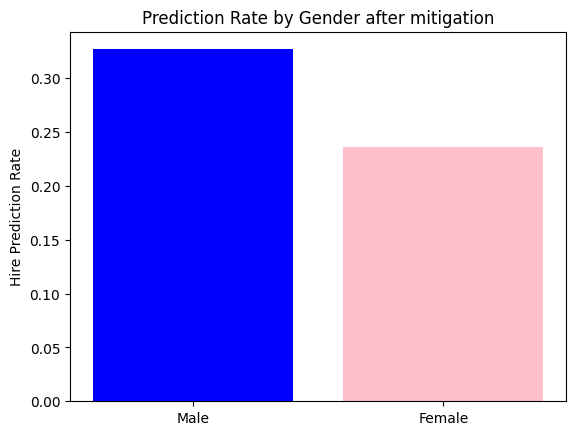

In [80]:
plt.bar(['Male', 'Female'], [pr_m_aug, pr_f_aug], color=['blue', 'pink'])
plt.title("Prediction Rate by Gender after mitigation")
plt.ylabel("Hire Prediction Rate")
plt.show()

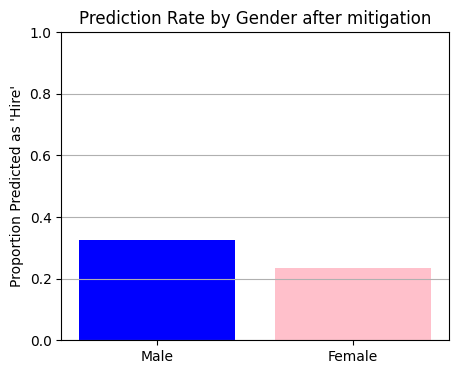

In [81]:
plt.figure(figsize=(5, 4))
plt.bar(['Male', 'Female'], [pr_m_aug, pr_f_aug], color=['blue', 'pink'])
plt.title("Prediction Rate by Gender after mitigation")
plt.ylabel("Proportion Predicted as 'Hire'")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()


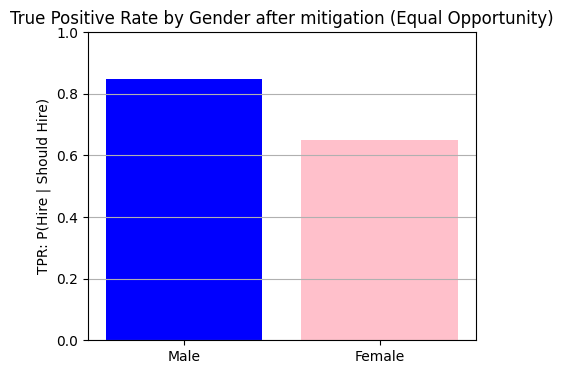

In [82]:
plt.figure(figsize=(5, 4))
plt.bar(['Male', 'Female'], [tpr_m_aug, tpr_f_aug], color=['blue', 'pink'])
plt.title("True Positive Rate by Gender after mitigation (Equal Opportunity)")
plt.ylabel("TPR: P(Hire | Should Hire)")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

# 8.Conclusion

##  Performance & Fairness Comparison (Before vs After Bias Mitigation)

| **Metric**                          | **Before Mitigation** | **After Mitigation** |
|------------------------------------|------------------------|-----------------------|
| **Accuracy**                       | 0.823                  | 0.880                 |
| **Precision (Class 0)**            | 0.87                   | 0.90                  |
| **Recall (Class 0)**               | 0.87                   | 0.93                  |
| **F1-score (Class 0)**             | 0.87                   | 0.91                  |
| **Precision (Class 1)**            | 0.71                   | 0.84                  |
| **Recall (Class 1)**               | 0.72                   | 0.76                  |
| **F1-score (Class 1)**             | 0.72                   | 0.80                  |
| **Macro F1-score**                 | 0.79                   | 0.86                  |
| **Demographic Parity Difference**  | 0.0951                 | 0.0908                |
| **Equal Opportunity Difference**   | 0.2113                 | 0.1991                |
| **Average Odds Difference**        | 0.1099                 | 0.1089                |

 **Summary**:
- Accuracy and class-wise F1-scores improved after mitigation.
- Fairness metrics slightly improved — showing **less disparity across gender groups**.
- Counterfactual data augmentation enhanced **both performance and fairness**, making it an effective mitigation strategy in this context.


---
---
---